In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns= ['EIN' , 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# import numpy as np
# ask_log = pd.DataFrame(data={'ASK_AMT': (np.log10(application_df['ASK_AMT']))})
# ask_log.describe()

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts= application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Determine which values to replace if counts are less than ...?

replace_application = list(application_counts[application_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts= application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C1900        1
C3700        1
C1248        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class= list(classification_counts[classification_counts < 1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## 1st Optimization Attempt Modified ASK_AMT feature and used hidden layer nodes 70/30

     

In [9]:
application_df['ASK_AMT'].describe()


count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

<AxesSubplot:ylabel='Density'>

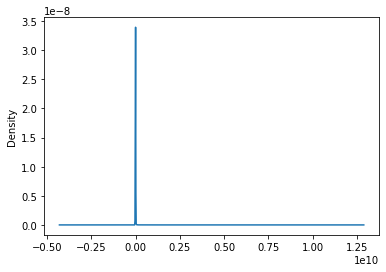

In [10]:
application_df['ASK_AMT'].plot.density()


# convert ASK_AMT using log10 function 



In [11]:
# convert ASK_AMT using log10 function
import numpy as np
application_df.ASK_AMT = np.log10(application_df['ASK_AMT'])
application_df.ASK_AMT.describe()

count    34299.000000
mean         4.087593
std          0.810174
min          3.698970
25%          3.698970
50%          3.698970
75%          3.888853
max          9.934388
Name: ASK_AMT, dtype: float64

In [12]:
# Generate our categorical variable lists

application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,3.698970,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,5.035790,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3.698970,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3.825556,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,5.154089,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,3.698970,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,3.698970,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,3.698970,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,3.698970,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# check for noisy variables in data
for i in application_df:
    print(application_df[i].value_counts())

1    34294
0        5
Name: STATUS, dtype: int64
3.698970    25398
4.020278        3
3.827692        3
4.192651        3
4.806051        3
            ...  
4.687306        1
7.153560        1
4.120607        1
5.398482        1
6.006295        1
Name: ASK_AMT, Length: 8747, dtype: int64
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
0.0    34023
1.0      276
Name: APPLICATION_TYPE_Other, dtype: int64
0.0    33771
1.0      528
Name: APPLICATION_TYPE_T10, dtype: int64
0.0    33234
1.0     1065
Name: APPLICATION_TYPE_T19, dtype: int64
1.0    27037
0.0     7262
Name: APPLICATION_TYPE_T3, dtype: int64
0.0    32757
1.0     1542
Name: APPLICATION_TYPE_T4, dtype: int64
0.0    33126
1.0     1173
Name: APPLICATION_TYPE_T5, dtype: int64
0.0    33083
1.0     1216
Name: APPLICATION_TYPE_T6, dtype: int64
0.0    33574
1.0      725
Name: APPLICATION_TYPE_T7, dtype: int64
0.0    33562
1.0      737
Name: APPLICATION_TYPE_T8, dtype: int64
0.0    18594
1.0    15705
Name: AFFILIATION_CompanySpons

In [16]:
#drop variables that have similar counts
application_df = application_df.drop(columns= ['SPECIAL_CONSIDERATIONS_Y','AFFILIATION_Other', 'AFFILIATION_Regional','USE_CASE_Other'])
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
0,1,3.698970,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,5.035790,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3.698970,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,3.825556,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,5.154089,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,3.698970,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,1,3.698970,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,1,3.698970,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,1,3.698970,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Split our preprocessed data into our features and target arrays
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 30

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
       

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                2800      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2130      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback] )

Epoch 1/100
804/804 [==============================] - 1s 639us/step - loss: 0.5786 - accuracy: 0.7182
Epoch 2/100
804/804 [==============================] - 1s 652us/step - loss: 0.5575 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 1s 646us/step - loss: 0.5531 - accuracy: 0.7298
Epoch 4/100
804/804 [==============================] - 1s 646us/step - loss: 0.5519 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 1s 643us/step - loss: 0.5502 - accuracy: 0.7322

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 640us/step - loss: 0.5479 - accuracy: 0.7337
Epoch 7/100
804/804 [==============================] - 1s 643us/step - loss: 0.5477 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 1s 651us/step - loss: 0.5471 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 640us/step - loss: 0.5468 - accuracy: 0.7339
Epoch 10/100
8

804/804 [==============================] - 1s 679us/step - loss: 0.5339 - accuracy: 0.7418
Epoch 72/100
804/804 [==============================] - 1s 668us/step - loss: 0.5336 - accuracy: 0.7418
Epoch 73/100
804/804 [==============================] - 1s 672us/step - loss: 0.5337 - accuracy: 0.7416
Epoch 74/100
804/804 [==============================] - 1s 663us/step - loss: 0.5334 - accuracy: 0.7423
Epoch 75/100
804/804 [==============================] - 1s 657us/step - loss: 0.5335 - accuracy: 0.7423

Epoch 00075: saving model to checkpoints2\weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 676us/step - loss: 0.5336 - accuracy: 0.7415
Epoch 77/100
804/804 [==============================] - 1s 680us/step - loss: 0.5333 - accuracy: 0.7421
Epoch 78/100
804/804 [==============================] - 1s 700us/step - loss: 0.5334 - accuracy: 0.7406
Epoch 79/100
804/804 [==============================] - 1s 677us/step - loss: 0.5335 - accuracy: 0.7418
Epoch 80/100
804/8

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 5.2265 - accuracy: 0.6715
Loss: 5.226465702056885, Accuracy: 0.6714868545532227


## Second Attempt - Modify activation to  Tanh, epoch  30 

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 20


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
       

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3200      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 4,841
Trainable params: 4,841
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=30,callbacks=[cp_callback] )

Epoch 1/30
804/804 [==============================] - 1s 647us/step - loss: 0.5804 - accuracy: 0.7142
Epoch 2/30
804/804 [==============================] - 1s 658us/step - loss: 0.5583 - accuracy: 0.7291
Epoch 3/30
804/804 [==============================] - 1s 655us/step - loss: 0.5542 - accuracy: 0.7303
Epoch 4/30
804/804 [==============================] - 1s 654us/step - loss: 0.5518 - accuracy: 0.7297
Epoch 5/30
804/804 [==============================] - 1s 651us/step - loss: 0.5512 - accuracy: 0.7309

Epoch 00005: saving model to checkpoints3\weights.05.hdf5
Epoch 6/30
804/804 [==============================] - 1s 658us/step - loss: 0.5497 - accuracy: 0.7309
Epoch 7/30
804/804 [==============================] - 1s 653us/step - loss: 0.5492 - accuracy: 0.7321
Epoch 8/30
804/804 [==============================] - 1s 651us/step - loss: 0.5479 - accuracy: 0.7326
Epoch 9/30
804/804 [==============================] - 1s 650us/step - loss: 0.5478 - accuracy: 0.7329
Epoch 10/30
804/804 [==

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0184 - accuracy: 0.6374
Loss: 1.018428921699524, Accuracy: 0.6374344229698181


## Third Attempt - Add a hidden layer

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
       

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 70)                2800      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 7,911
Trainable params: 7,911
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback] )

Epoch 1/100
804/804 [==============================] - 1s 761us/step - loss: 0.5742 - accuracy: 0.7184
Epoch 2/100
804/804 [==============================] - 1s 765us/step - loss: 0.5564 - accuracy: 0.7298
Epoch 3/100
804/804 [==============================] - 1s 749us/step - loss: 0.5524 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 1s 770us/step - loss: 0.5508 - accuracy: 0.7316
Epoch 5/100
804/804 [==============================] - 1s 748us/step - loss: 0.5499 - accuracy: 0.7315

Epoch 00005: saving model to checkpoints4\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 767us/step - loss: 0.5481 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 789us/step - loss: 0.5480 - accuracy: 0.7331
Epoch 8/100
804/804 [==============================] - 1s 805us/step - loss: 0.5474 - accuracy: 0.73380s - loss: 0.555
Epoch 9/100
804/804 [==============================] - 1s 805us/step - loss: 0.5467 - accuracy: 0.734

Epoch 71/100
804/804 [==============================] - 1s 793us/step - loss: 0.5332 - accuracy: 0.7409
Epoch 72/100
804/804 [==============================] - 1s 752us/step - loss: 0.5325 - accuracy: 0.7407
Epoch 73/100
804/804 [==============================] - 1s 744us/step - loss: 0.5331 - accuracy: 0.7412
Epoch 74/100
804/804 [==============================] - 1s 741us/step - loss: 0.5326 - accuracy: 0.7427
Epoch 75/100
804/804 [==============================] - 1s 744us/step - loss: 0.5326 - accuracy: 0.7411

Epoch 00075: saving model to checkpoints4\weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 745us/step - loss: 0.5326 - accuracy: 0.7419
Epoch 77/100
804/804 [==============================] - 1s 755us/step - loss: 0.5324 - accuracy: 0.7418
Epoch 78/100
804/804 [==============================] - 1s 736us/step - loss: 0.5321 - accuracy: 0.7427
Epoch 79/100
804/804 [==============================] - 1s 741us/step - loss: 0.5319 - accuracy: 0.7426
Epoch

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0436 - accuracy: 0.7137
Loss: 1.043553352355957, Accuracy: 0.7137026190757751
